# SOEN7481 Fuzzing Assignment – Linqiang Guo


## 1. Introduction
### What is Fuzzing?
Fuzzing is an automated software testing technique that provides random, unexpected, or malformed inputs to a program to discover bugs, vulnerabilities, or unexpected behaviors.

### What is Coverage-Guided Fuzzing?
Coverage-guided fuzzing improves upon traditional random fuzzing by tracking which parts of the program are executed. It prioritizes inputs that increase code coverage, making testing **more efficient** in finding edge cases and bugs.

### Goal of This Assignment
We will compare **pure random fuzzing** and **coverage-guided fuzzing** using three test programs:
1. **Mathematical Expression Evaluator & Graphing Calculator** - Evaluates and plots mathematical functions.
2. **Advanced JSON Processor** - Parses, validates, and converts JSON data.
3. **Dungeon Generator with Pathfinding** - Generates a random dungeon and finds the shortest path.

The goal is to understand how coverage-guided fuzzing improves software testing compared to pure random input generation.


## 2. Importing Dependencies & Programs
Before implementing the fuzzer, we import essential libraries:
- `random`: Used for generating random inputs.
- `json`: For handling JSON data.
- `numpy`: Used for numerical operations and data handling.
- `matplotlib.pyplot`: Used for plotting coverage results.
- `complex_input`, `maze`, `toy_lang`: import three program integrated with fuzzing.


In [1]:
# Import necessary libraries
import random
import json
import numpy as np
import matplotlib.pyplot as plt
import complex_input
import maze
import toy_lang

### 3. Run Fuzzing with three programs
We implement two different fuzzers integrated with three programs:
1. **Pure Random Fuzzer**: Generates completely random inputs without any feedback from previous executions.
2. **Coverage-Guided Fuzzer**: Uses past execution coverage data to guide input mutation, increasing its ability to explore new paths.

The comparison will help us analyze which fuzzer is more efficient at detecting unique execution paths and potential software failures.


### 3.1 Run the First program

Simulating complex operations...
Fibonacci: 55, Message: simulation complex from world Hello, Squares: 385

Running pure random fuzzing...
Final coverage (branches covered) with Pure Random: 22

Running coverage-guided fuzzing...
Final coverage (branches covered) with Coverage-Guided: 23

Plotting coverage evolution...


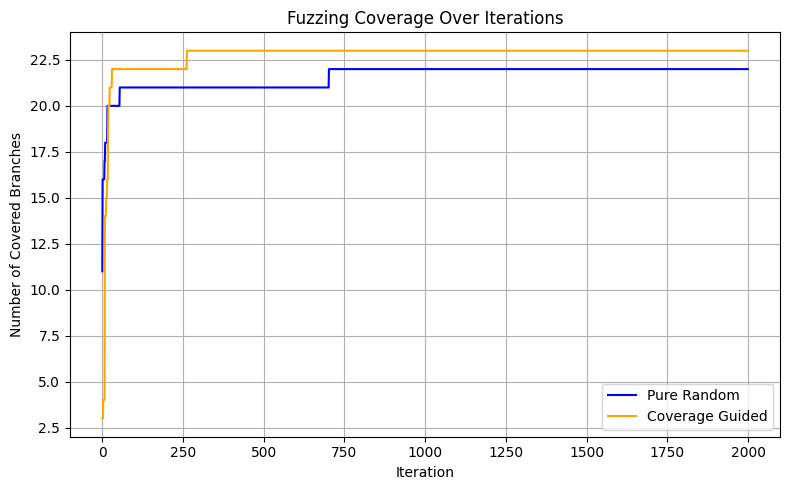

In [5]:
complex_input.main()

### 3.2. Run fuzzers with maze

=== Maze Solver: Tracking Coverage Over Time ===
Sample Maze:
 S.#.
.#F.
....

Found a path:
S.#.
*#F.
***.

=== Running Pure Random Fuzzing ===
Final Covered Branches (Pure Random): dict_keys(['found_start', 'found_finish', 'maze_parsed', 'bfs_start', 'queue_append', 'path_found', 'no_path', 'non_rectangular', 'exception', 'no_finish'])
Coverage Growth (Pure Random): [10, 10, 10, 10, 10, 10, 10, 10, 10, 10] ... (last 10 iterations)

=== Running Coverage-Guided Fuzzing ===
Final Covered Branches (Coverage Guided): dict_keys(['found_start', 'non_rectangular', 'exception', 'invalid_char', 'found_finish', 'maze_parsed', 'bfs_start', 'queue_append', 'path_found', 'no_finish', 'no_start', 'multiple_start'])
Coverage Growth (Coverage Guided): [12, 12, 12, 12, 12, 12, 12, 12, 12, 12] ... (last 10 iterations)

=== Plotting Coverage Over Iterations ===


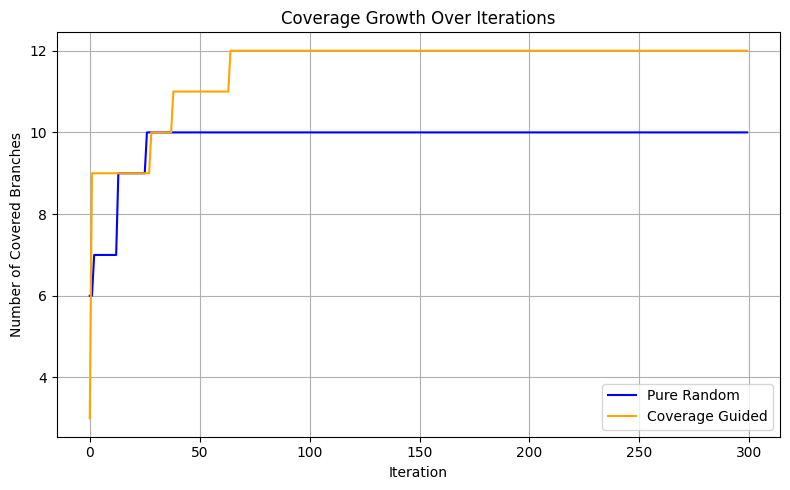

In [6]:
maze.main()

### 3.3. Run fuzzers with toy_lang


=== Demo Code ===
x=2; y=3; print(x*y);
6

=== Running Pure Random Fuzzing ===
Final coverage with Pure Random: 22

=== Running Coverage-Guided Fuzzing ===
12
22
12
24
12
123
23
36
Final coverage with Coverage-Guided: 30

=== Plotting Coverage Evolution ===


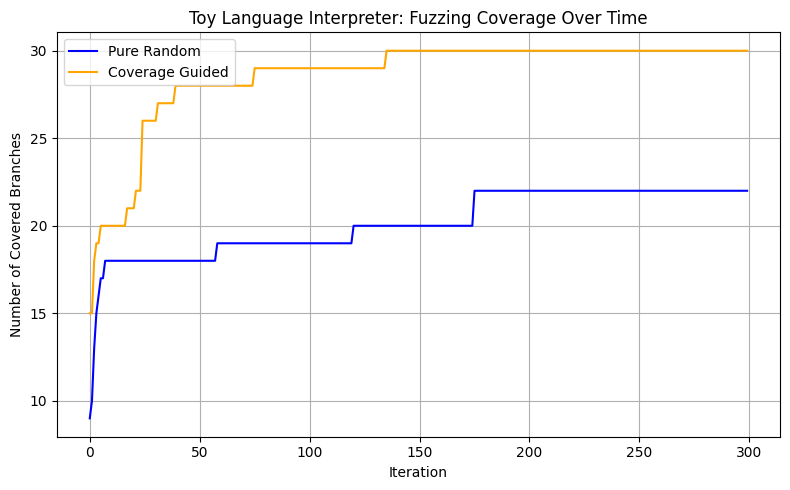

In [7]:
toy_lang.main()

## 4. Findings & Discussion
## Discussion of Fuzzing Results

### Complex Input Processor
- **Observation**: Both pure random and coverage-guided fuzzing converged on almost the same final coverage (22 vs. 23).
- **Growth Pattern**: Coverage for both methods plateaued quickly, indicating that most branches were easy to discover.
- **Conclusion**: In a relatively simple input‐processing scenario with a limited number of branches, **coverage‐guided fuzzing** offers only a slight advantage but still outperforms pure random by discovering new branches slightly earlier.

### Maze Solver
- **Observation**: Coverage‐guided fuzzing reached a higher final coverage (12) compared to pure random fuzzing (10).
- **Growth Pattern**: The coverage‐guided curve rose faster initially, suggesting it quickly found maze structures that triggered new branches (e.g., multiple starts, invalid shapes).
- **Conclusion**: Because the maze input is more structured, coverage‐guided fuzzing more effectively mutates and discovers new error paths or configurations. **Pure random** inputs struggled to generate sufficiently varied or valid mazes after a certain point.

### Toy Language Interpreter
- **Observation**: This scenario showed the **biggest gap** in coverage: pure random reached 22, while coverage‐guided reached 30.
- **Growth Pattern**: The coverage‐guided approach kept discovering new branches even after random fuzzing plateaued, indicating it was better at producing meaningful (or partially valid) code snippets.
- **Conclusion**: In complex, highly structured inputs like a toy language, **coverage‐guided fuzzing** provides a significant advantage by evolving inputs that trigger new parsing rules, semantic checks, or runtime conditions. Pure random inputs rarely form valid code to explore these deeper branches.

### Overall Findings
- **Coverage‐guided fuzzing** outperforms pure random fuzzing across all three programs, with the largest differences seen in more structured inputs (Maze, Toy Language).
- In simpler scenarios (Complex Input Processor), both approaches can achieve high coverage, but guided fuzzing still offers a slight edge.
- **Random fuzzing** often plateaus early, failing to discover inputs that reach deeper or more complex branches.


## 5. Final Discussion

Across the three programs—Complex Input Processor, Maze Solver, and Toy Language Interpreter—we consistently observe that **coverage-guided fuzzing** is more effective at uncovering new branches compared to pure random fuzzing. While the advantage is minimal in simpler scenarios (such as the Complex Input Processor), it becomes increasingly pronounced when inputs are more structured, as seen with the Maze Solver and, most notably, the Toy Language Interpreter.

**Why does coverage-guided fuzzing outperform pure random approaches?**  
- Coverage-guided fuzzers prioritize inputs that lead to **newly covered** parts of the code, effectively “rewarding” test cases that explore fresh branches.  
- This guided approach is especially beneficial for structured or semi-structured inputs, where random mutations alone often fail to produce meaningful variations.  

**Key Observations**  
1. **Simple vs. Complex Branching**: In a program with a small set of conditions or easily triggered branches, random fuzzing can match or come close to coverage-guided results.  
2. **Structured Inputs**: As soon as the program requires more specific input formats (mazes, language syntax), coverage-guided fuzzing outperforms pure random by mutating seeds that have already proven to reach deeper logic.  
3. **Long-Term Gains**: Random fuzzing tends to plateau early, while coverage-guided approaches continue discovering new paths by systematically refining inputs.

**Implications for Software Testing**  
- Coverage-guided fuzzing provides a **more systematic** way to explore code, particularly in scenarios with complex input grammars or multi-stage processing.  
- For applications like interpreters, compilers, or data format parsers, **guiding mutations based on coverage** can reveal corner cases and subtle bugs that random input generation is unlikely to uncover.

In conclusion, **coverage-guided fuzzing** offers a more efficient path to high coverage, making it a powerful strategy for testing software with intricate or structured input requirements. While pure random fuzzing can still find basic errors and is simpler to implement, it rarely matches the thoroughness of coverage-guided methods in more complex domains.
